In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
house_price_dataset = fetch_california_housing()

In [10]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [11]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [12]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
house_price_dataframe['price'] = house_price_dataset.target

In [14]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [15]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [30]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [18]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
correlation = house_price_dataframe.corr()

<Axes: >

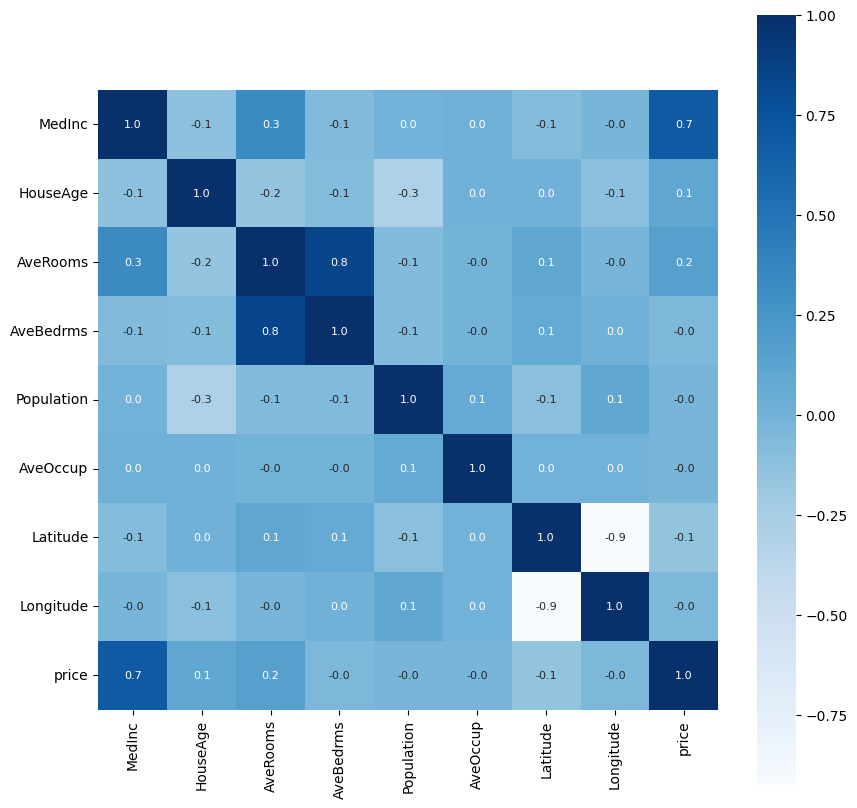

In [20]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [31]:
# Model Training
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[0.52965593 3.1472757  0.5715334  ... 1.8530489  1.8935575  0.8152826 ]


In [33]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8981798273040519
Mean Absolute Error :  0.2550189186011056


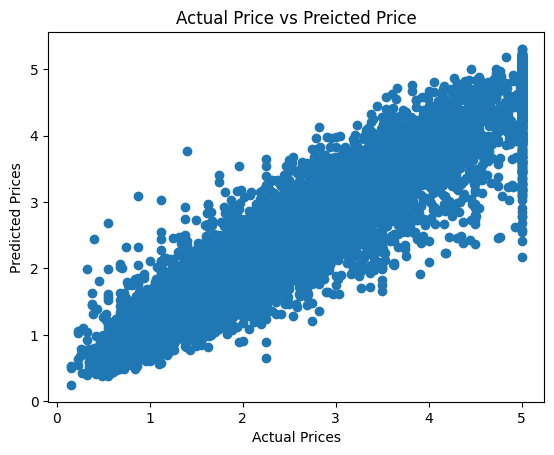

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [35]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.8065045 1.7728466 0.9027971 ... 1.4463245 0.9558996 2.0520458]


In [36]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8284283812595884
Mean Absolute Error :  0.3141077107467416


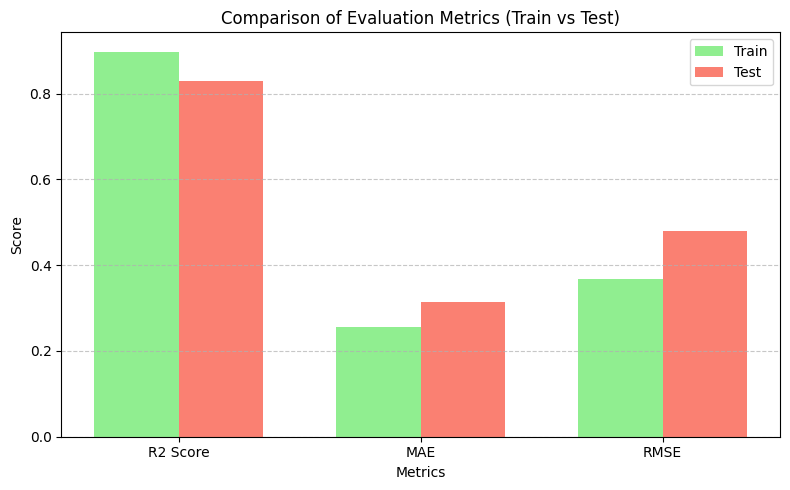

In [37]:
# Calculate RMSE
train_rmse = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))
test_rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

# Metrics to display
metrics_names = ['R2 Score', 'MAE', 'RMSE']
train_metrics = [metrics.r2_score(Y_train, training_data_prediction),
                 metrics.mean_absolute_error(Y_train, training_data_prediction),
                 train_rmse]
test_metrics = [metrics.r2_score(Y_test, test_data_prediction),
                metrics.mean_absolute_error(Y_test, test_data_prediction),
                test_rmse]

# Plot
x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_metrics, width, label='Train', color='lightgreen')
plt.bar(x + width/2, test_metrics, width, label='Test', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics (Train vs Test)')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
# Get mean of actual values
mean_train_price = np.mean(Y_train)
mean_test_price = np.mean(Y_test)

# Training metrics
train_r2 = r2_score(Y_train, training_data_prediction) * 100  # %
train_mae = (mean_absolute_error(Y_train, training_data_prediction) / mean_train_price) * 100
train_rmse = (np.sqrt(mean_squared_error(Y_train, training_data_prediction)) / mean_train_price) * 100

# Testing metrics
test_r2 = r2_score(Y_test, test_data_prediction) * 100  # %
test_mae = (mean_absolute_error(Y_test, test_data_prediction) / mean_test_price) * 100
test_rmse = (np.sqrt(mean_squared_error(Y_test, test_data_prediction)) / mean_test_price) * 100

# Print in percentage form
print("\n========== Training Accuracy Metrics ==========")
print(f"R² Score           : {train_r2:.2f}%")
print(f"MAE (Percent Error): {train_mae:.2f}%")
print(f"RMSE (Percent Error): {train_rmse:.2f}%")

print("\n========== Testing Accuracy Metrics ==========")
print(f"R² Score           : {test_r2:.2f}%")
print(f"MAE (Percent Error): {test_mae:.2f}%")
print(f"RMSE (Percent Error): {test_rmse:.2f}%")



========== Training Accuracy Metrics ==========
R² Score           : 89.82%
MAE (Percent Error): 12.35%
RMSE (Percent Error): 17.80%

========== Testing Accuracy Metrics ==========
R² Score           : 82.84%
MAE (Percent Error): 15.08%
RMSE (Percent Error): 23.09%
